## Part 1: Data Handling and Preprocessing

### Dataset Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = "Loan Prediction data.csv"
data = pd.read_csv(file_path)
df = data.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.shape

(614, 13)

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


The dataset consists of 614 records and 13 attributes, including both numerical and categorical variables. Here’s a quick breakdown:

* **Categorical Variables**: ```Gender```, ```Married```, ```Dependents```, ```Education```, ```Self_Employed```, ```Property_Area```, ```Loan_Status```
* **Numerical Variables**: ```ApplicantIncome```, ```CoapplicantIncome```, ```LoanAmount```, ```Loan_Amount_Term```, ```Credit_History```
* **Target Variable**: ```Loan_Status``` (indicating loan approval status)

**Key Observations**:
* Some columns have missing values, especially LoanAmount, Credit_History, Self_Employed, and Dependents.
* Loan_ID is a unique identifier and won’t be useful for modeling.
* ```ApplicantIncome``` and ```CoapplicantIncome``` likely affect ```LoanAmount``` and ```Loan_Status```.

### Data Cleaning

In [6]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicate records
duplicates = df.duplicated().sum()

missing_values, duplicates

(Loan_ID               0
 Gender               13
 Married               3
 Dependents           15
 Education             0
 Self_Employed        32
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount           22
 Loan_Amount_Term     14
 Credit_History       50
 Property_Area         0
 Loan_Status           0
 dtype: int64,
 0)

#### Data Cleaning Findings:
* **Missing Values** are present in:
    * ```Gender``` (13 missing)
    * ```Married``` (3 missing)
    * ```Dependents``` (15 missing)
    * ```Self_Employed``` (32 missing)
    * ```LoanAmount``` (22 missing)
    * ```Loan_Amount_Term``` (14 missing)
    * ```Credit_History``` (50 missing)
* **No duplicate** records found.
#### Cleaning Plan:
1. Fill missing categorical values (```Gender```, ```Married```, ```Dependents```, ```Self_Employed```) with the most frequent category.
2. Fill missing numerical values:
    * ```LoanAmount``` with median.
    * ```Loan_Amount_Term``` with the most common term.
    * ```Credit_History``` with the most common value.

In [7]:
# Fill missing categorical values with mode (most frequent category)
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill missing numerical values with median or mode
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Verify if all missing values are handled
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

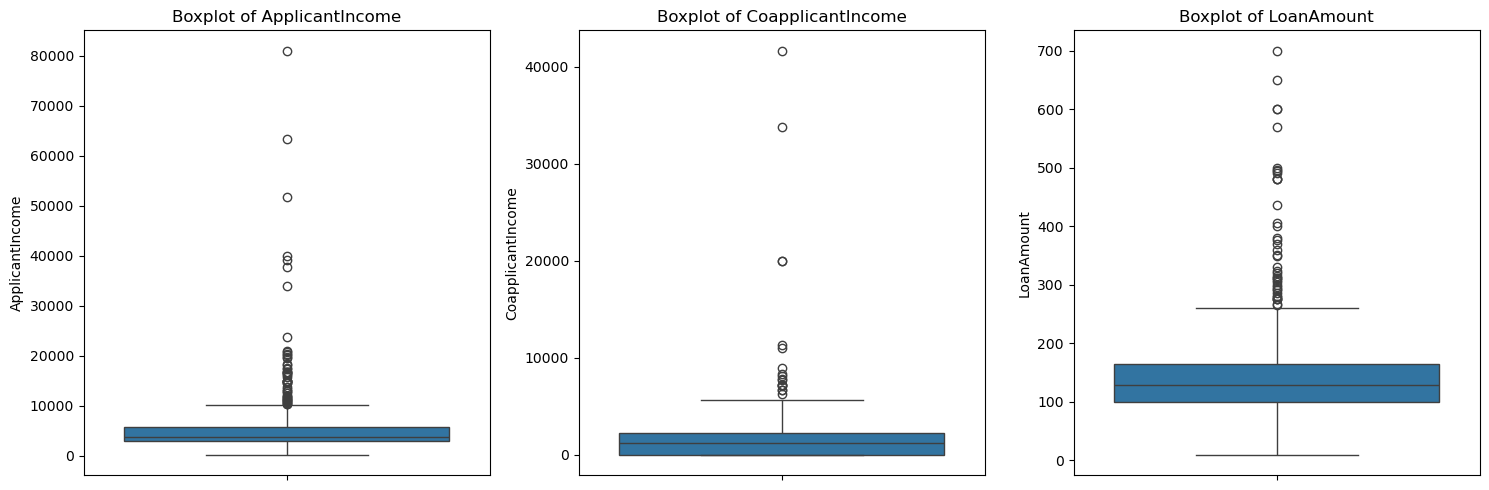

In [8]:
# Plot boxplots to detect outliers
plt.figure(figsize=(15, 5))
for i, col in enumerate(["ApplicantIncome", "CoapplicantIncome", "LoanAmount"], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

The boxplots reveal significant outliers in ```ApplicantIncome```, ```CoapplicantIncome```, and ```LoanAmount```.  Handle them using the Interquartile Range (IQR) method to cap extreme values.

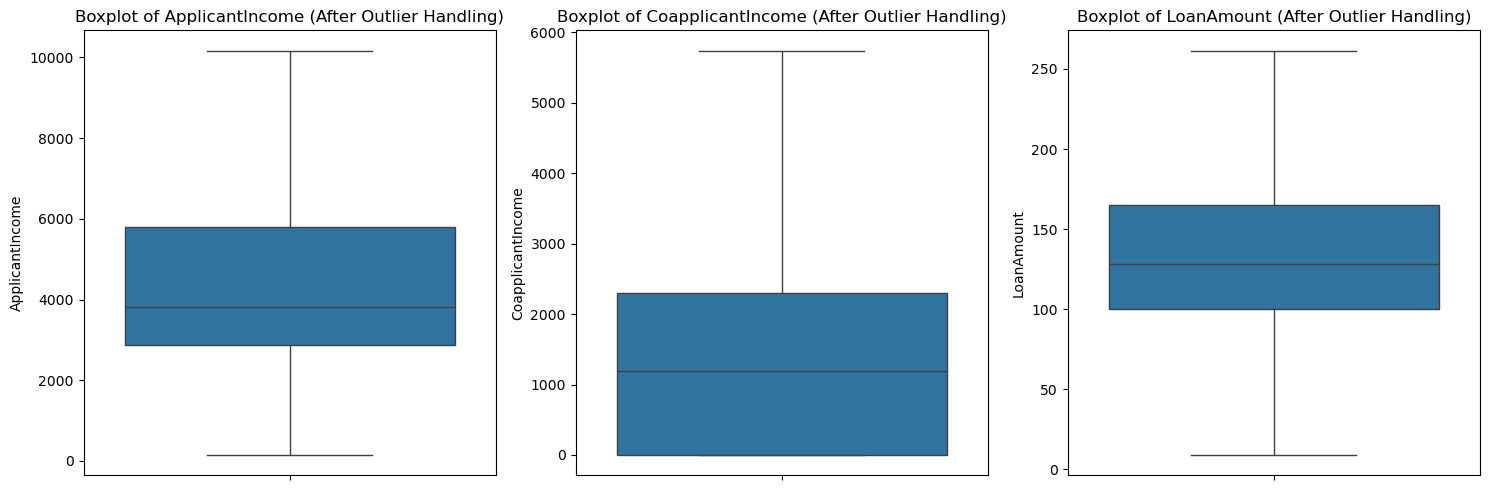

In [9]:
# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Apply to numerical columns
for col in ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]:
    remove_outliers(df, col)

# Replot boxplots to verify outlier removal
plt.figure(figsize=(15, 5))
for i, col in enumerate(["ApplicantIncome", "CoapplicantIncome", "LoanAmount"], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col} (After Outlier Handling)")

plt.tight_layout()
plt.show()

### EDA

In [10]:
# Display basic info and summary statistics
df.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,502,401,360,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,4617.111564,1419.702231,137.365635,342.410423,0.855049,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2479.851729,1624.605892,55.779749,64.428629,0.352339,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


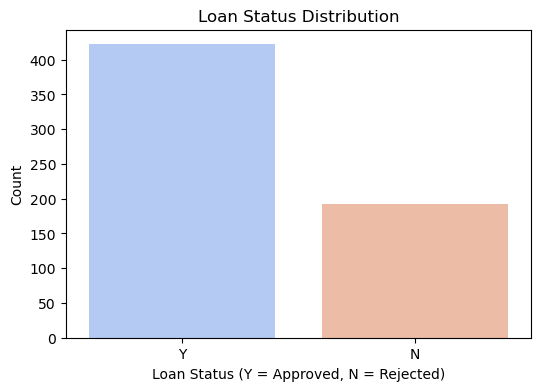

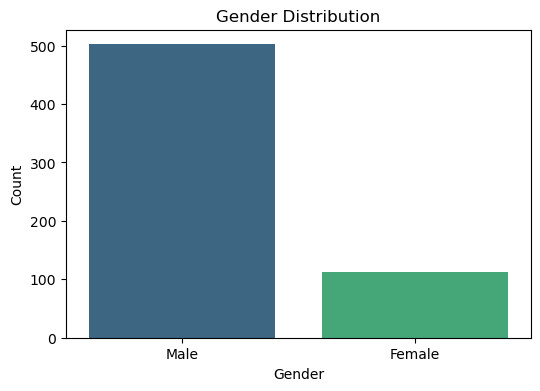

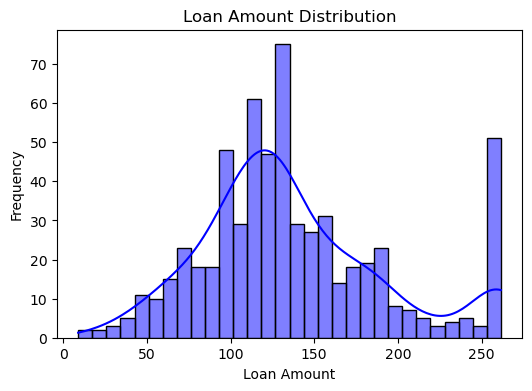

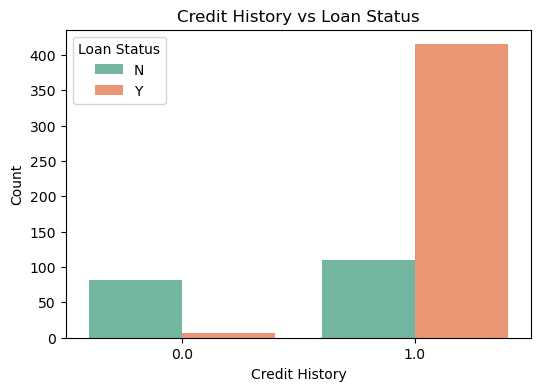

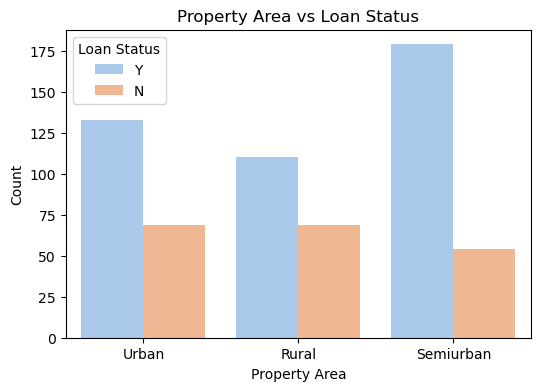

In [11]:
# Loan Status Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Loan_Status'], palette="coolwarm")
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status (Y = Approved, N = Rejected)")
plt.ylabel("Count")
plt.show()

# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Gender'], palette="viridis")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Loan Amount Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df["LoanAmount"], bins=30, kde=True, color='blue')
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

# Credit History vs Loan Status
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Credit_History'], hue=df['Loan_Status'], palette="Set2")
plt.title("Credit History vs Loan Status")
plt.xlabel("Credit History")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()

# Property Area vs Loan Status
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Property_Area'], hue=df['Loan_Status'], palette="pastel")
plt.title("Property Area vs Loan Status")
plt.xlabel("Property Area")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()


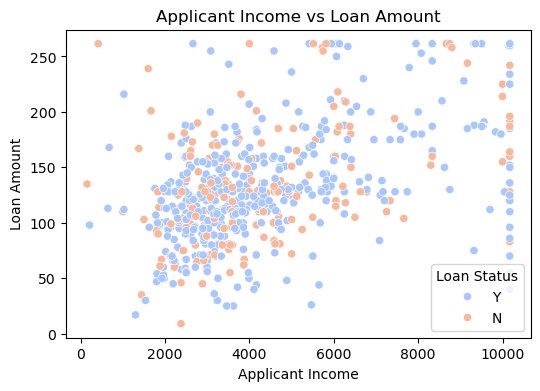

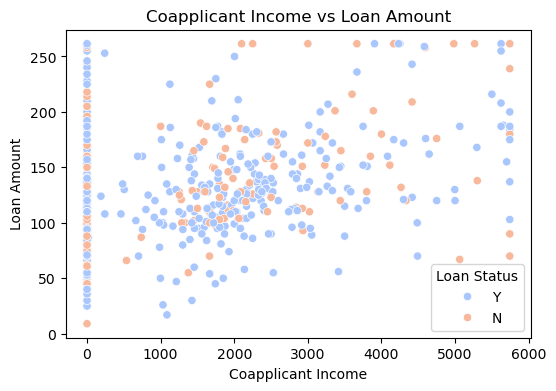

In [12]:
# Income vs Loan Amount Scatter Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["ApplicantIncome"], y=df["LoanAmount"], hue=df["Loan_Status"], palette="coolwarm")
plt.title("Applicant Income vs Loan Amount")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.legend(title="Loan Status")
plt.show()

# Coapplicant Income vs Loan Amount Scatter Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["CoapplicantIncome"], y=df["LoanAmount"], hue=df["Loan_Status"], palette="coolwarm")
plt.title("Coapplicant Income vs Loan Amount")
plt.xlabel("Coapplicant Income")
plt.ylabel("Loan Amount")
plt.legend(title="Loan Status")
plt.show()

#### Key Insights from Visualizations:
1. **Loan Status Distribution**:
    * More loans are approved (```Y```) than rejected (```N```).
2. **Gender Distribution**:
    * Majority of applicants are **Male**.
3. **Loan Amount Distribution**:
    * Right-skewed, indicating a few **very high loan amounts**.
4. **Credit History vs Loan Status**:
    * Applicants with **positive credit history (1)** have higher loan approval rates.
5. **Property Area vs Loan Status**:
    * **Semiurban areas** have the highest number of loan approvals.
6. **Applicant Income vs Loan Amount**:
    * Higher incomes generally lead to higher loan amounts.
    * No clear separation between approved and rejected loans.   
7. **Coapplicant Income vs Loan Amount**:
    * Some zero-income coapplicants exist, likely single applicants.
    * Approved and rejected loans are mixed, suggesting other factors matter more.

### Feature Engineering

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables using Label Encoding
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# One-hot encode 'Dependents' as it has multiple unique values
#df = pd.get_dummies(df, columns=['Dependents'], drop_first=True)

# Normalize numerical variables
scaler = StandardScaler()
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Create a new feature: TotalIncome (sum of Applicant and Coapplicant Income)
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Display first few rows after feature engineering
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,1,0,0,0,0,0.497164,-0.874587,-0.168041,0.273231,0.411733,2,1,-0.377423
1,LP001003,1,1,1,0,0,-0.013767,0.054395,-0.168041,0.273231,0.411733,0,0,0.040628
2,LP001005,1,1,0,0,1,-0.652632,-0.874587,-1.280462,0.273231,0.411733,2,1,-1.527219
3,LP001006,1,1,0,1,0,-0.820924,0.578025,-0.311579,0.273231,0.411733,2,1,-0.242899
4,LP001008,1,0,0,0,0,0.558104,-0.874587,0.065209,0.273231,0.411733,2,1,-0.316483


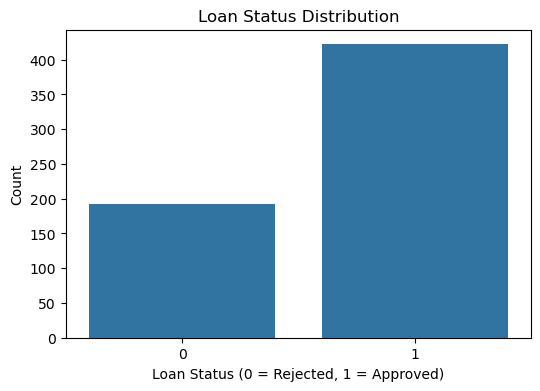

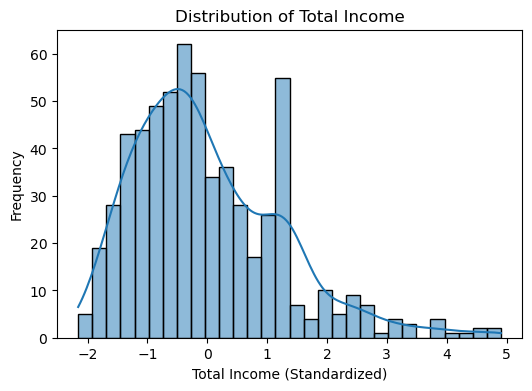

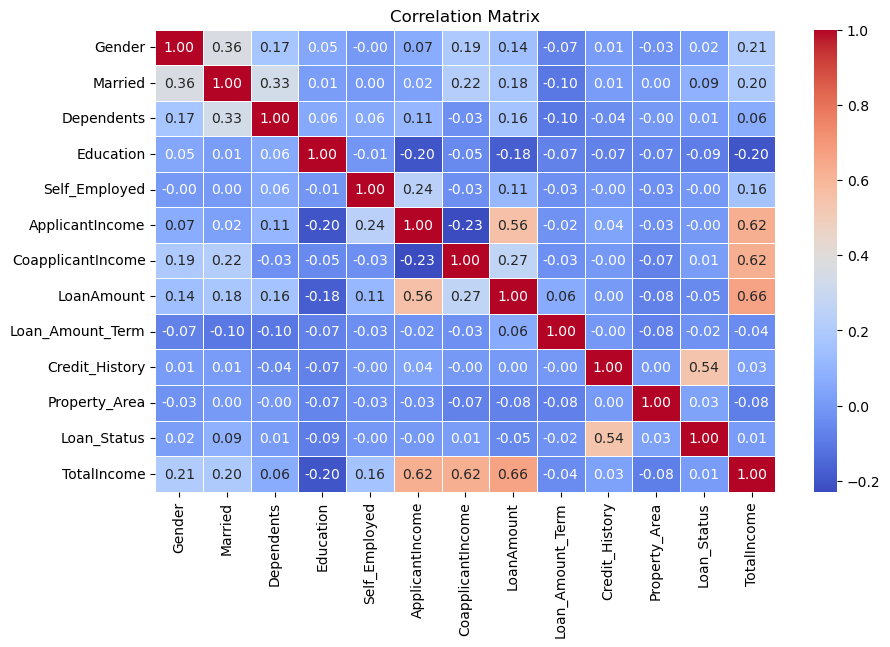

In [14]:
# Visualizing Loan Status distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Loan_Status'])
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
plt.ylabel("Count")
plt.show()

# Visualizing TotalIncome distribution
plt.figure(figsize=(6, 4))
sns.histplot(df["TotalIncome"], bins=30, kde=True)
plt.title("Distribution of Total Income")
plt.xlabel("Total Income (Standardized)")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns=['Loan_ID']).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

#### Feature Engineering Summary:
✔ **Categorical encoding**: Used Label Encoding for categorical variables.

✔ **Numerical normalization**: Scaled ```ApplicantIncome```, ```CoapplicantIncome```, ```LoanAmount```, ```Loan_Amount_Term```, and ```Credit_History```.

✔ **New feature added**: ```TotalIncome``` (sum of ```ApplicantIncome``` and ```CoapplicantIncome```).

1. **Total Income Distribution**: Shows a right-skewed trend, even after standardization, suggesting a few high-income applicants.
2. **Correlation Matrix**:
    * ```TotalIncome``` has a moderate positive correlation with ```LoanAmount```.
    * ```Credit_History``` has a strong correlation with ```Loan_Status```, indicating a significant factor in loan approval.
    * ```ApplicantIncome``` and ```CoapplicantIncome``` are weakly correlated with ```Loan_Status```.

###  Probability Distributions and Hypothesis Testing

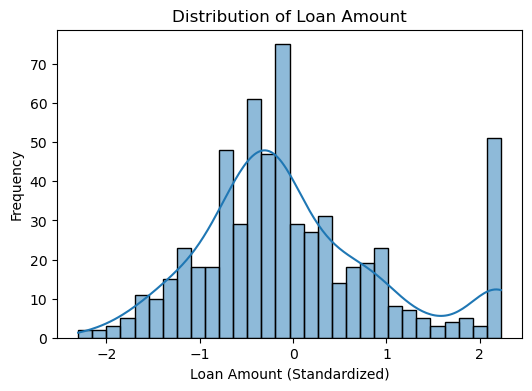

('Not Normal',
                    ApplicantIncome  CoapplicantIncome  LoanAmount
 ApplicantIncome           1.000000          -0.228956    0.557953
 CoapplicantIncome        -0.228956           1.000000    0.265021
 LoanAmount                0.557953           0.265021    1.000000,
 (0.11087854691241235, 0.7391461310869638, 'Independent'))

In [15]:
import scipy.stats as stats

# Check probability distribution of 'LoanAmount'
plt.figure(figsize=(6, 4))
sns.histplot(df["LoanAmount"], bins=30, kde=True)
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount (Standardized)")
plt.ylabel("Frequency")
plt.show()

# Test for normality using Shapiro-Wilk test
stat, p_value = stats.shapiro(df["LoanAmount"])
normality_test_result = "Normal" if p_value > 0.05 else "Not Normal"

# Correlation between income and loan amount
correlation_matrix = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].corr()

# Hypothesis test: Loan approval independence from gender (Chi-Square Test)
contingency_table = pd.crosstab(df["Gender"], df["Loan_Status"])
chi2_stat, chi2_p, dof, expected = stats.chi2_contingency(contingency_table)
gender_independence = "Independent" if chi2_p > 0.05 else "Dependent"

normality_test_result, correlation_matrix, (chi2_stat, chi2_p, gender_independence)

In [16]:
# Compute central tendency (mean, median, mode)
central_tendency = data[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]].agg(["mean", "median"])

# Compute mode separately (since it's not compatible with .agg())
mode_values = data[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]].mode().iloc[0]

# Compute dispersion (variance, standard deviation)
dispersion_measures = data[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]].agg(["var", "std"])

central_tendency, mode_values, dispersion_measures

(        ApplicantIncome  CoapplicantIncome  LoanAmount
 mean        5403.459283        1621.245798  146.412162
 median      3812.500000        1188.500000  128.000000,
 ApplicantIncome      2500.0
 CoapplicantIncome       0.0
 LoanAmount            120.0
 Name: 0, dtype: float64,
      ApplicantIncome  CoapplicantIncome   LoanAmount
 var     3.732039e+07       8.562930e+06  7325.190241
 std     6.109042e+03       2.926248e+03    85.587325)

#### Probability & Hypothesis Testing Insights:
1. **Loan Amount Distribution**:
    * The Shapiro-Wilk test indicates that ```LoanAmount``` is not normally distributed (p-value < 0.05).
    * This suggests using non-parametric methods for further analysis.
2. **Correlation Analysis**:
    * ```ApplicantIncome``` and ```LoanAmount``` show moderate correlation (0.56), meaning higher applicants' income somewhat influences loan amounts.
    * ```CoapplicantIncome``` and ```LoanAmount``` have a weaker correlation (0.27).
3. **Hypothesis Test (Loan Approval vs. Gender)**:
    * Chi-Square Test (p-value = 0.739) suggests that loan approval is independent of applicant ```gender```.

### Machine Learning Model Building

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

In [19]:
# Define features and target variable
X = df.drop(columns=["Loan_ID", "Loan_Status"])
y = df["Loan_Status"]

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
import joblib

In [24]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="linear", probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate models
results = {}
best_model = None
best_model_name = None
best_accuracy = 0
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    # Save the best model based on highest accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name
    
    results[name] = {
        "Accuracy": accuracy,
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-score": report['weighted avg']['f1-score']
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T.sort_values(by="Accuracy", ascending=False)
results_df

,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.853659,0.869641,0.853659,0.840441
SVM,0.853659,0.869641,0.853659,0.840441
KNN,0.837398,0.834181,0.837398,0.831488
Random Forest,0.821138,0.816448,0.821138,0.816521
Gradient Boosting,0.821138,0.816452,0.821138,0.814636
XGBoost,0.764228,0.766000,0.764228,0.765061
Decision Tree,0.739837,0.743809,0.739837,0.741624


In [25]:
# Save the best model
joblib.dump(best_model, "best_loan_model.pkl")
print(f"Best Model: {best_model_name} (Accuracy: {best_accuracy:.2%})")

Best Model: Logistic Regression (Accuracy: 85.37%)


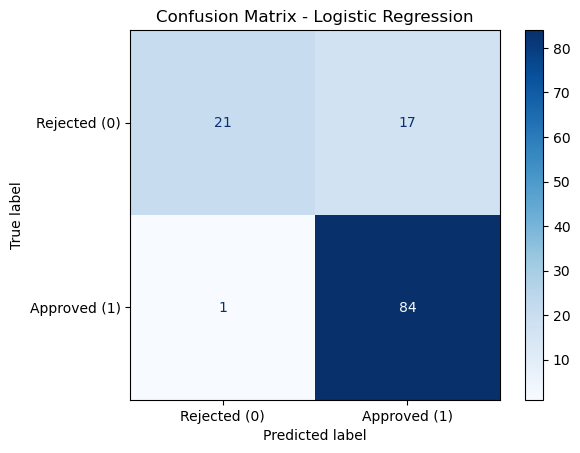

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the saved model (optional, if needed)
best_model = joblib.load("best_loan_model.pkl")

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Rejected (0)', 'Approved (1)'])
disp.plot(cmap='Blues', values_format='d')

plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

In [33]:
y_proba = best_model.predict_proba(X_test)[:, 1]
y_proba

array([0.06602117, 0.82554086, 0.7592485 , 0.80868122, 0.86409268,
       0.70321993, 0.78620579, 0.80012461, 0.68162161, 0.63272034,
       0.82092064, 0.83471642, 0.81059236, 0.83509061, 0.12471262,
       0.07716978, 0.7809005 , 0.08832856, 0.08115854, 0.77789916,
       0.09338486, 0.68193997, 0.77354375, 0.80487963, 0.82520552,
       0.74414889, 0.75766168, 0.81604392, 0.07448114, 0.80011913,
       0.82168879, 0.81714836, 0.85366924, 0.84363648, 0.66662332,
       0.78061796, 0.06334714, 0.8483273 , 0.74511404, 0.8300619 ,
       0.85673156, 0.75047689, 0.80530151, 0.82418802, 0.76495643,
       0.83380691, 0.81510184, 0.77744877, 0.82945917, 0.61210433,
       0.11612534, 0.85603205, 0.06970929, 0.80577426, 0.64405352,
       0.78253719, 0.08653373, 0.8774397 , 0.84297973, 0.66461459,
       0.0786293 , 0.67600195, 0.7154809 , 0.77672006, 0.79513929,
       0.77805611, 0.82729187, 0.87679223, 0.67356937, 0.80245342,
       0.85440726, 0.12413553, 0.87189385, 0.78101926, 0.86823

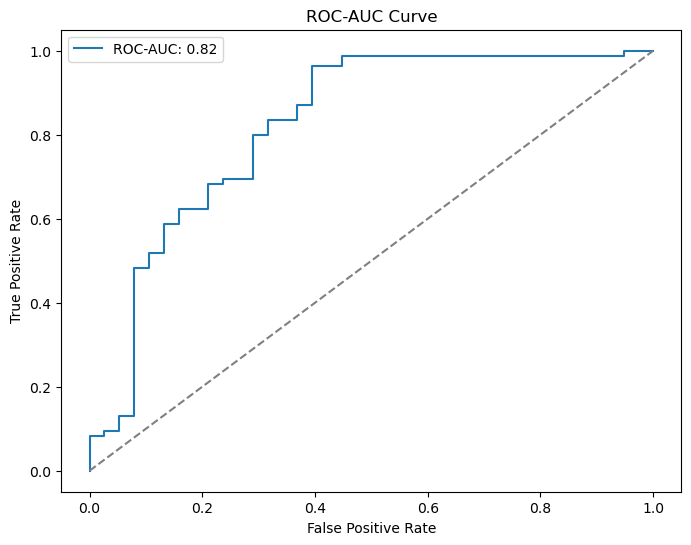

In [34]:
# ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC-AUC: {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

In [27]:
# Ensure the model supports feature importance
if hasattr(best_model, "feature_importances_"):
    # Extract feature importance
    feature_importances = best_model.feature_importances_

    # Create DataFrame for visualization
    feat_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 5))
    sns.barplot(x=feat_importance_df['Importance'], y=feat_importance_df['Feature'], palette="viridis")
    plt.title(f"Feature Importance - {best_model_name}")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.show()
else:
    print(f"Feature importance not available for {best_model_name}")

Feature importance not available for Logistic Regression


In [32]:
import shap

In [35]:
explainer = shap.Explainer(best_model, X_test)
shap_values = explainer(X_test)

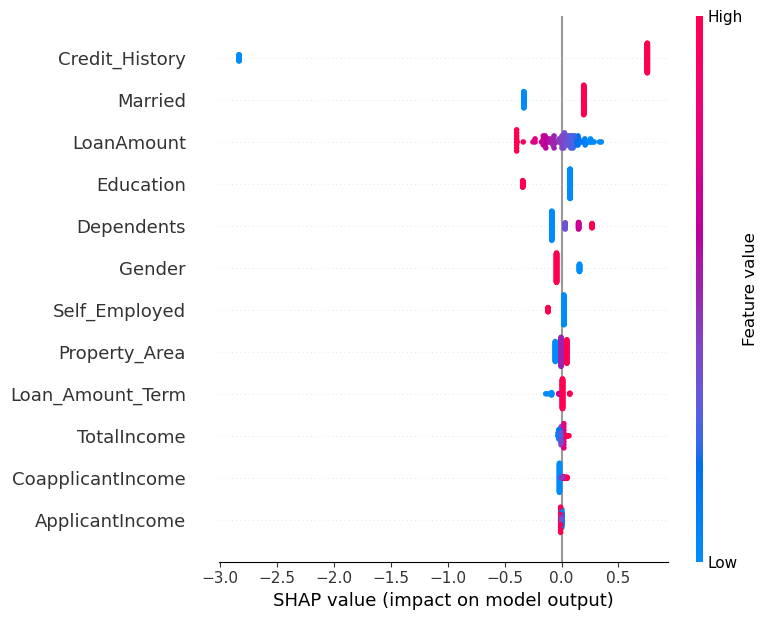

In [36]:
# Summary Plot
shap.summary_plot(shap_values, X_test)

### Test the Model with a Single Input


In [40]:
# Load the saved model
best_model = joblib.load("best_loan_model.pkl")

# Define input values (modify based on dataset features)
applicant_income = 10000  # ApplicantIncome
coapplicant_income = 15000  # CoapplicantIncome

# Compute TotalIncome
total_income = applicant_income + coapplicant_income

# Define a single input with TotalIncome included
single_input = np.array([[1,  # Gender (1 = Male, 0 = Female)
                          1,  # Married (1 = Yes, 0 = No)
                          0,  # Dependents (e.g., 0, 1, 2, 3)
                          1,  # Education (1 = Graduate, 0 = Not Graduate)
                          0,  # Self_Employed (1 = Yes, 0 = No)
                          applicant_income,  # ApplicantIncome
                          coapplicant_income,  # CoapplicantIncome
                          total_income,  # TotalIncome (New Feature)
                          1280,  # LoanAmount
                          3600,  # Loan_Amount_Term
                          1,  # Credit_History (1 = Good, 0 = Bad)
                          2]])  # Property_Area (0 = Urban, 1 = Rural, 2 = Semiurban)

# Make a prediction
prediction = best_model.predict(single_input)

# Interpret and display the result
loan_status = "Approved" if prediction[0] == 1 else "Rejected"
print(f"Loan Prediction: {loan_status}")

Loan Prediction: Approved
